In [451]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='darkgrid')

In [329]:
df = pd.read_csv('final_data.csv')
df.head()

,Product Names,Product Price,Percentage Off,Product Link,Product Type,Special Product,Product Rating,Customer Rated,Sizes
0,METRONAUT,₹299,85% off,https://www.flipkart.com/metronaut-solid-men-r...,NaN,NaN,NaN,NaN,NaN
1,METRONAUT By Flipkart,₹319,84% off,https://www.flipkart.com/metronaut-solid-men-p...,NaN,NaN,NaN,NaN,NaN
2,AUSK,₹199,86% off,https://www.flipkart.com/ausk-striped-men-roun...,NaN,NaN,NaN,NaN,NaN
3,VeBNoR,₹279,79% off,https://www.flipkart.com/vebnor-checkered-men-...,NaN,NaN,NaN,NaN,NaN
4,AUSK,₹199,86% off,https://www.flipkart.com/ausk-striped-men-roun...,NaN,NaN,NaN,NaN,NaN


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Names    1040 non-null   object 
 1   Product Price    1040 non-null   object 
 2   Percentage Off   1040 non-null   object 
 3   Product Link     1040 non-null   object 
 4   Product Type     1040 non-null   object 
 5   Special Product  701 non-null    object 
 6   Product Rating   701 non-null    float64
 7   Customer Rated   701 non-null    object 
 8   Sizes            1040 non-null   object 
dtypes: float64(1), object(8)
memory usage: 146.4+ KB


In [331]:
df.describe()

,Product Rating
count,701.000000
mean,3.909843
std,0.122370
min,3.700000
25%,3.800000
50%,4.000000
75%,4.000000
max,4.100000


## Data Exploration and Data Cleaning

In [333]:
df.drop(columns=['Product Link','Special Product'],inplace=True)

In [334]:
df.head(10)

,Product Names,Product Price,Percentage Off,Product Type,Product Rating,Customer Rated,Sizes
0,METRONAUT,₹299,85% off,NaN,NaN,NaN,NaN
1,METRONAUT By Flipkart,₹319,84% off,NaN,NaN,NaN,NaN
2,AUSK,₹199,86% off,NaN,NaN,NaN,NaN
3,VeBNoR,₹279,79% off,NaN,NaN,NaN,NaN
4,AUSK,₹199,86% off,NaN,NaN,NaN,NaN
5,NB NICKY BOY,₹239,69% off,NaN,NaN,NaN,NaN
6,MBFMart,₹249,64% off,NaN,NaN,NaN,NaN
7,METRONAUT,₹299,85% off,NaN,NaN,NaN,NaN
8,AUSK,₹199,86% off,NaN,NaN,NaN,NaN
9,NB NICKY BOY,₹239,64% off,NaN,NaN,NaN,NaN


In [335]:
df.isnull().sum()

Product Names     1040
Product Price     1040
Percentage Off    1040
Product Type      1040
Product Rating    1379
Customer Rated    1379
Sizes             1040
dtype: int64

__Replacing Product Names Null Values with Product Type.__ 

In [336]:
df['Product Type']=df['Product Type'].str.split(',').str[0]
df['Product Type']=df['Product Type'].str.split(' ').str[0]

In [337]:
df['Product Names'].fillna(df['Product Type'],inplace=True)

In [338]:
df.isnull().sum()

Product Names        0
Product Price     1040
Percentage Off    1040
Product Type      1040
Product Rating    1379
Customer Rated    1379
Sizes             1040
dtype: int64

In [339]:
df['Product Price'].unique()

array(['₹299', '₹319', '₹199', '₹279', '₹239', '₹249', '₹259', '₹189',
       '₹269', '₹469', '₹399', '₹349', '₹479', '₹1,049', '₹248', '₹459',
       '₹310', '₹449', '₹294', nan], dtype=object)

In [340]:
df['Product Price']=df['Product Price'].str.split('₹').str[1]
df['Product Price']=df['Product Price'].str.replace(",","")
df['Product Price']=df['Product Price'].fillna('0')

In [341]:
df['Product Price']=df['Product Price'].astype('int')
df['Product Price'].replace(0,int(df['Product Price'].mean()),inplace=True)

In [350]:
df['Percentage Off']=df['Percentage Off'].fillna('0')
df['Percentage Off']=df['Percentage Off'].str.split('%').str[0].astype('int')

In [372]:
df['Product Rating'].fillna(0,inplace=True)

In [376]:
df['Customer Rated'].unique()

array([nan, '11,386 ratings and 841 reviews',
       '11,254 ratings and 709 reviews', '13,375 ratings and 989 reviews',
       '11,254 ratings and 686 reviews',
       '66,706 ratings and 3,794 reviews',
       '11,386 ratings and 869 reviews', '14,701 ratings and 669 reviews',
       '40,617 ratings and 2,880 reviews', '1,133 ratings and 53 reviews',
       '11,070 ratings and 562 reviews', '9,390 ratings and 806 reviews',
       '20,961 ratings and 1,211 reviews',
       '1,00,218 ratings and 7,796 reviews',
       '72,771 ratings and 5,861 reviews',
       '6,733 ratings and 476 reviews', '3,187 ratings and 267 reviews',
       '1,00,015 ratings and 7,967 reviews',
       '29,040 ratings and 2,330 reviews',
       '2,472 ratings and 109 reviews',
       '48,111 ratings and 3,696 reviews',
       '20,961 ratings and 1,289 reviews',
       '72,771 ratings and 5,741 reviews',
       '3,187 ratings and 271 reviews', '3,629 ratings and 265 reviews',
       '48,111 ratings and 3,742 revi

In [379]:
# Rating
df['Total no of Rating']=df['Customer Rated'].str.split(' ').str[0]

In [390]:
df['Total no of Rating']=df['Total no of Rating'].str.replace(',','')
df['Total no of Rating']=df['Total no of Rating'].fillna(0)
df['Total no of Rating']=df['Total no of Rating'].astype('int')

In [383]:
# Reviews
df['Total no of Review']=df['Customer Rated'].str.split(' ').str[3]

In [392]:
df['Total no of Review']=df['Total no of Review'].str.replace(',','')
df['Total no of Review']=df['Total no of Review'].fillna(0)
df['Total no of Review']=df['Total no of Review'].astype('int')

In [393]:
df.head()

,Product Names,Product Price,Percentage Off,Product Type,Product Rating,Customer Rated,Sizes,Total no of Rating,Total no of Review
0,METRONAUT,299,85,NaN,0.0,NaN,NaN,0,0
1,METRONAUT By Flipkart,319,84,NaN,0.0,NaN,NaN,0,0
2,AUSK,199,86,NaN,0.0,NaN,NaN,0,0
3,VeBNoR,279,79,NaN,0.0,NaN,NaN,0,0
4,AUSK,199,86,NaN,0.0,NaN,NaN,0,0


In [397]:
df['Sizes'].fillna('No size Available',inplace=True)

In [403]:
df.drop(columns=['Product Type','Customer Rated'],inplace=True)

In [404]:
df.head()

,Product Names,Product Price,Percentage Off,Product Rating,Sizes,Total no of Rating,Total no of Review
0,METRONAUT,299,85,0.0,No size Available,0,0
1,METRONAUT By Flipkart,319,84,0.0,No size Available,0,0
2,AUSK,199,86,0.0,No size Available,0,0
3,VeBNoR,279,79,0.0,No size Available,0,0
4,AUSK,199,86,0.0,No size Available,0,0


### Checking Unique Vaues

In [413]:
df.head()

,Product Names,Product Price,Percentage Off,Product Rating,Sizes,Total no of Rating,Total no of Review
0,METRONAUT,299,85,0.0,No size Available,0,0
1,METRONAUT By Flipkart,319,84,0.0,No size Available,0,0
2,AUSK,199,86,0.0,No size Available,0,0
3,VeBNoR,279,79,0.0,No size Available,0,0
4,AUSK,199,86,0.0,No size Available,0,0


In [414]:
df['Product Names'].unique()

array(['METRONAUT', 'METRONAUT By Flipkart', 'AUSK', 'VeBNoR',
       'NB NICKY BOY', 'MBFMart', 'EyeBogler', 'TRIPR', 'Smartees',
       'London Hills', 'TEEMEX', 'FTX', 'InkTees', '3BROS', 'Try This',
       'Triangletees', 'BLIVE', 'COLORPLUS', 'TQH', 'V DAS', 'KAJARU',
       'The Million Club', 'Adrenex', 'NB', 'London', 'Try', 'V', 'The'],
      dtype=object)

In [417]:
df['Percentage Off'].unique()

array([85, 84, 86, 79, 69, 64, 81, 87, 83, 88, 73, 90, 68, 65, 70, 80, 82,
       50, 77, 76,  0])

In [415]:
df['Product Rating'].unique()

array([0. , 3.8, 4. , 3.9, 3.7, 4.1])

In [416]:
df['Sizes'].unique()

array(['No size Available', 'S,M,L,XL,XXL', 'S,M,L,XXL', 'S,XL',
       'S,M,L,XL', 'M,L,XL', 'S,L,XL,XXL', 'XS,S,M,L,XL,XXL',
       'S,M,L,XL,XXL,3XL,4XL,5XL', 'L', 'S', 'M,L,XL,XXL', 'S,M,XL,XXL',
       '3XL,4XL,5XL,6XL', 'S,M,XL', 'S,L,XXL'], dtype=object)

### Describing Dataset

In [411]:
df.describe()

,Product Price,Percentage Off,Product Rating,Total no of Rating,Total no of Review
count,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,210.684615,38.867788,1.317692,8608.146635,604.205288
std,93.430225,39.384665,1.849957,20058.105393,1477.161975
min,140.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000
50%,164.500000,25.000000,0.000000,0.000000,0.000000
75%,249.000000,80.000000,3.800000,11254.000000,669.250000
max,1049.000000,90.000000,4.100000,100225.000000,7974.000000


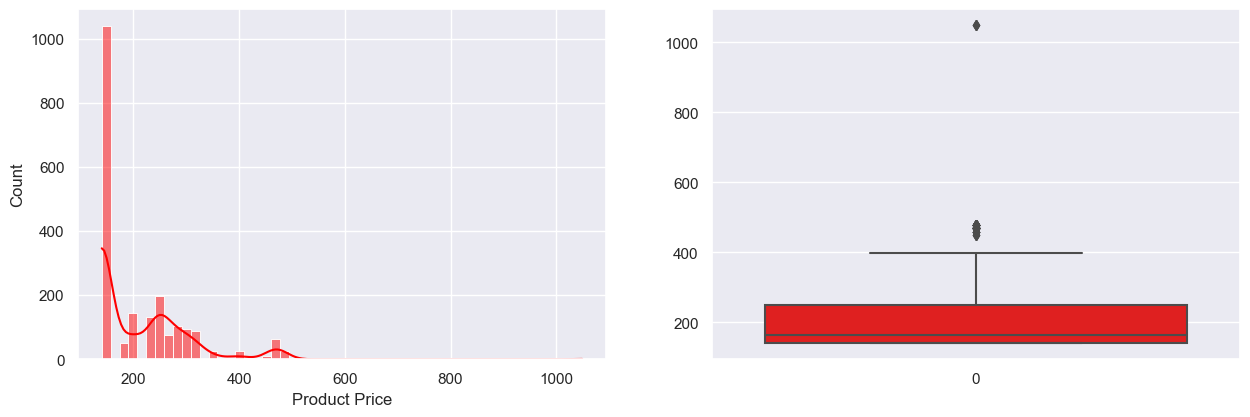

In [452]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Product Price'],kde=True,color='Red')
plt.subplot(2,2,2)
sns.boxplot(data=df['Product Price'],color='Red')
plt.show()

In [427]:
# Inter Quantile Range
percentile25 = df['Product Price'].quantile(0.25)
percentile75 = df['Product Price'].quantile(0.75)
IQR = percentile75 - percentile25
min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR

In [435]:
# Trimming
new_df = df[(df["Product Price"]>min) & (df["Product Price"]<max)]

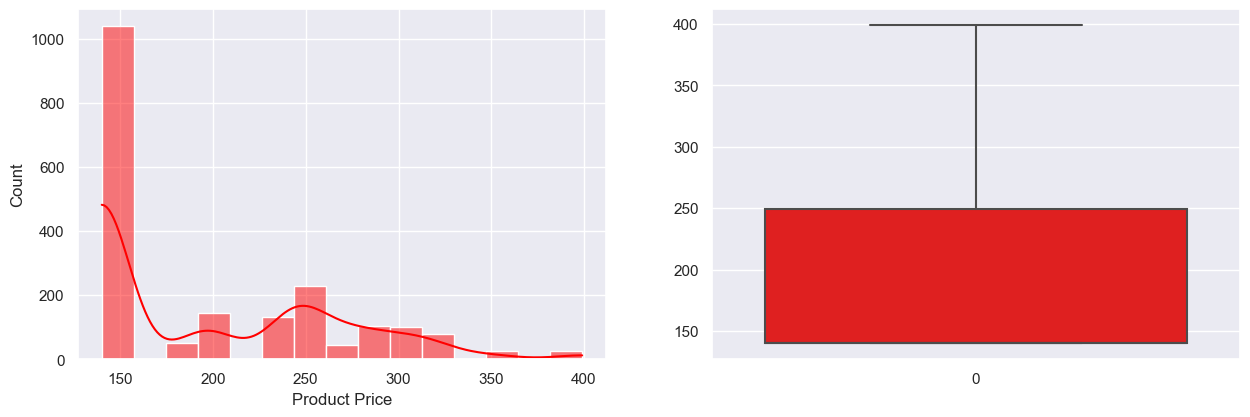

In [453]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=new_df['Product Price'],kde=True,color='red')
plt.subplot(2,2,2)
sns.boxplot(data=new_df['Product Price'],color='red')
plt.show()

In [441]:
new_df.shape

(1980, 7)

## Data Visualization

#### 1. Analyzing Product Names

In [482]:
new_df['Product Names'].value_counts()

METRONAUT                259
MBFMart                  236
AUSK                     208
VeBNoR                   208
EyeBogler                186
Smartees                 104
NB NICKY BOY             103
NB                       103
METRONAUT By Flipkart     78
FTX                       62
TEEMEX                    60
3BROS                     60
TRIPR                     52
InkTees                   52
BLIVE                     46
London Hills              26
London                    26
Try                       23
Try This                  23
KAJARU                    22
Triangletees              10
V DAS                      9
V                          9
TQH                        7
COLORPLUS                  3
The                        3
Adrenex                    2
Name: Product Names, dtype: int64

In [483]:
new_df['Product Names'].value_counts(normalize=True)

METRONAUT                0.130808
MBFMart                  0.119192
AUSK                     0.105051
VeBNoR                   0.105051
EyeBogler                0.093939
Smartees                 0.052525
NB NICKY BOY             0.052020
NB                       0.052020
METRONAUT By Flipkart    0.039394
FTX                      0.031313
TEEMEX                   0.030303
3BROS                    0.030303
TRIPR                    0.026263
InkTees                  0.026263
BLIVE                    0.023232
London Hills             0.013131
London                   0.013131
Try                      0.011616
Try This                 0.011616
KAJARU                   0.011111
Triangletees             0.005051
V DAS                    0.004545
V                        0.004545
TQH                      0.003535
COLORPLUS                0.001515
The                      0.001515
Adrenex                  0.001010
Name: Product Names, dtype: float64

<Axes: ylabel='Product Names'>

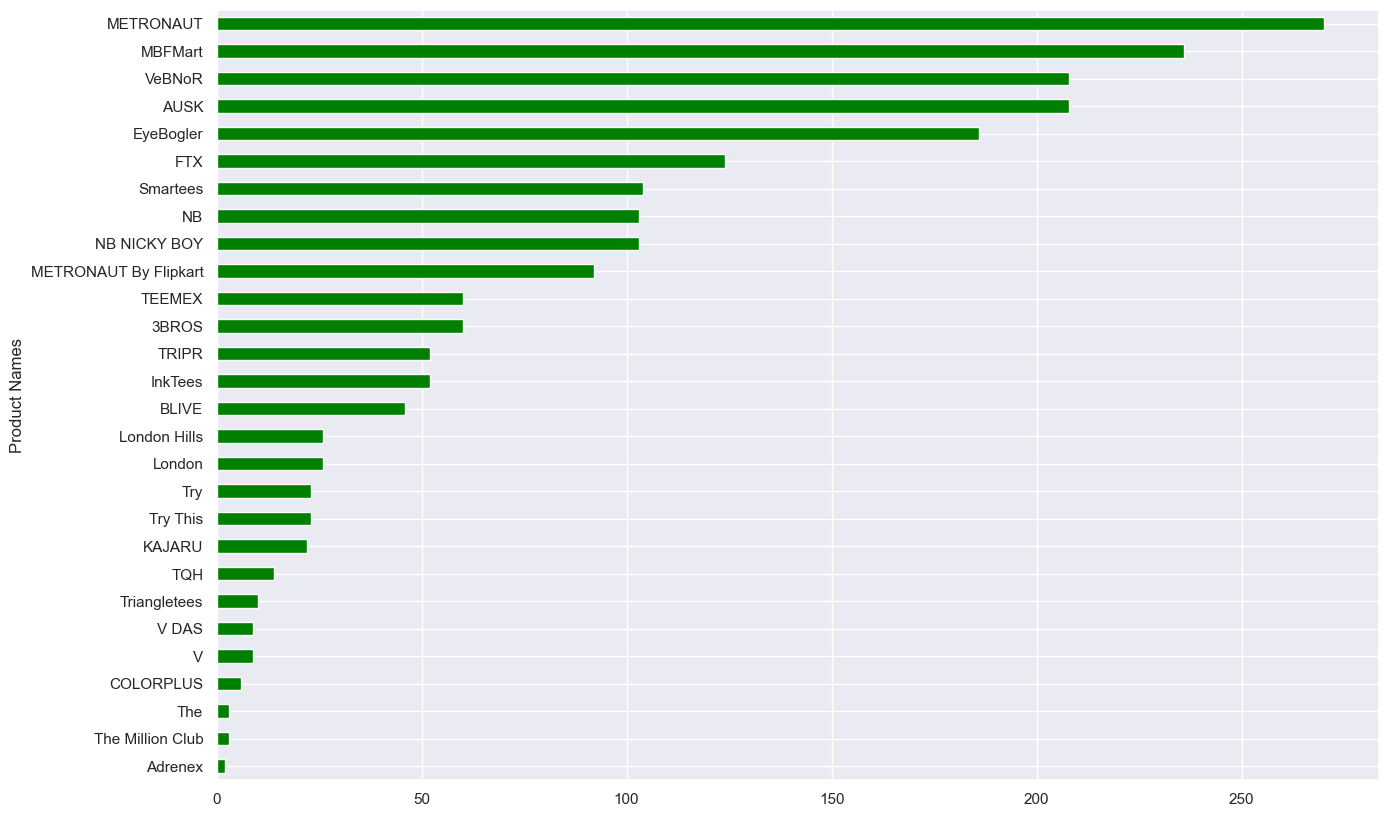

In [484]:
plt.figure(figsize=(15,10))
df.groupby('Product Names').size().sort_values().plot.barh(color='green')

__Observation :__
METRONAUT T Shirt product are more in number in data.

#### 2. Product Price

In [485]:
new_df['Product Price'].value_counts(bins=5)

(139.74, 191.8]    1092
(243.6, 295.4]      378
(191.8, 243.6]      278
(295.4, 347.2]      180
(347.2, 399.0]       52
Name: Product Price, dtype: int64

In [486]:
# Measure Central Tendency and Dispersion
print('Mean               : ',new_df['Product Price'].mean())
print('Median             : ',new_df['Product Price'].median())
print('Standard Deviation : ',new_df['Product Price'].std())
print('Variance           : ',new_df['Product Price'].var())

Mean               :  196.6989898989899
Median             :  140.0
Standard Deviation :  67.86099023700969
Variance           :  4605.113995947525


In [488]:
# Spread
new_df['Product Price'].skew()
# Highly Skewed

0.8001507038478988

In [489]:
new_df['Product Price'].kurt()

-0.4746723223416631

<Axes: xlabel='Product Price', ylabel='Count'>

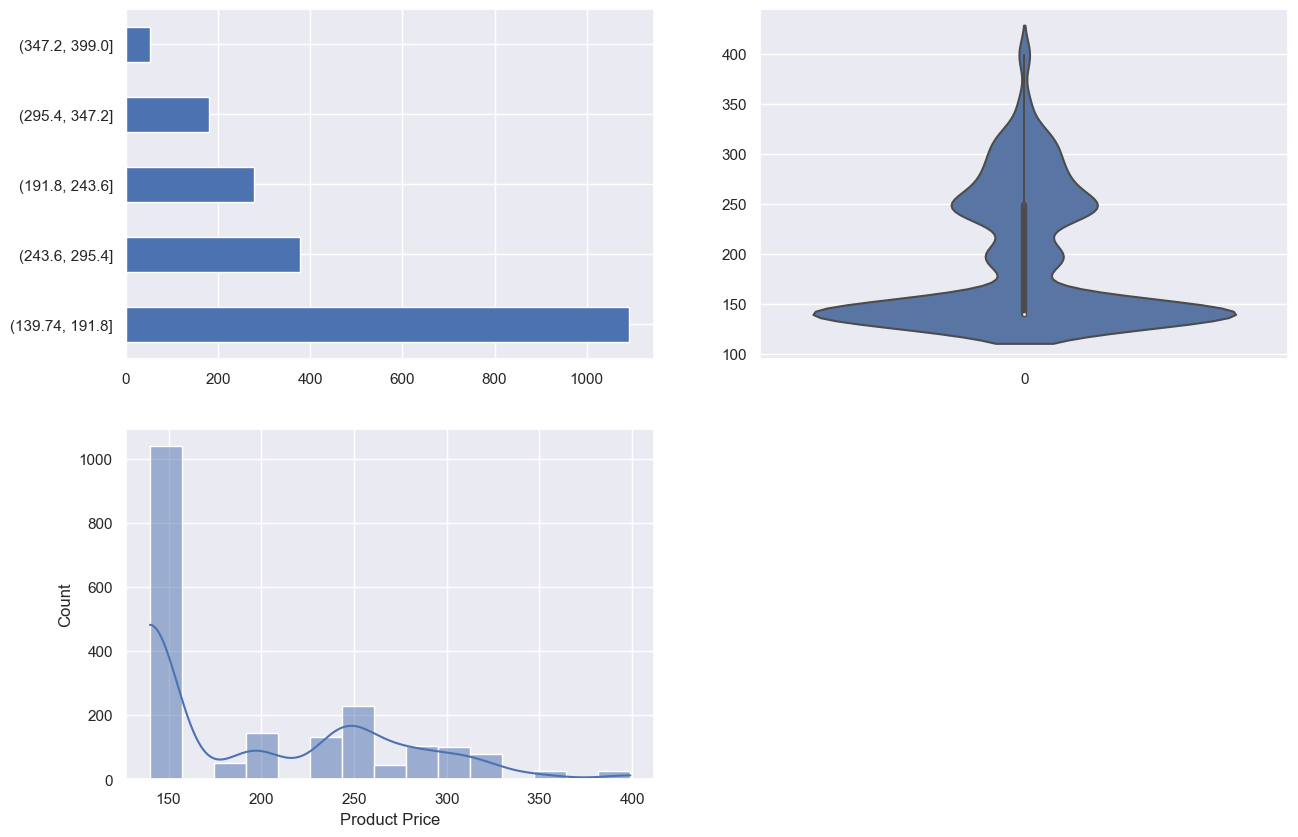

In [498]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
new_df['Product Price'].value_counts(bins=5).plot.barh()
plt.subplot(2,2,2)
sns.violinplot(new_df['Product Price'])
plt.subplot(2,2,3)
sns.histplot(x=new_df['Product Price'],kde=True)

#### 3. Percentage Off

In [500]:
df['Percentage Off'].unique()

array([85, 84, 86, 79, 69, 64, 81, 87, 83, 88, 73, 90, 68, 65, 70, 80, 82,
       50, 77, 76,  0])

In [501]:
print('Mean               : ',new_df['Percentage Off'].mean())
print('Median             : ',new_df['Percentage Off'].median())
print('Standard Deviation : ',new_df['Percentage Off'].std())
print('Variance           : ',new_df['Percentage Off'].var())

Mean               :  37.3050505050505
Median             :  0.0
Standard Deviation :  39.716566240089925
Variance           :  1577.405633903451


<Axes: >

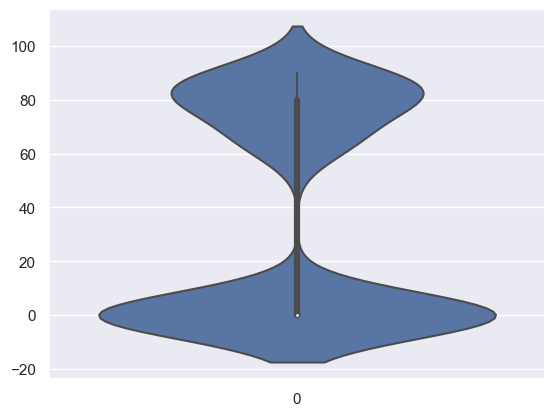

In [539]:
sns.violinplot(new_df['Percentage Off'])

In [540]:
new_df['Percentage Off'].value_counts()

0     1040
64     170
79     108
84     104
85     104
86     104
90      52
80      52
69      51
88      37
87      31
81      30
83      26
73      26
65      26
76       9
82       5
70       5
Name: Percentage Off, dtype: int64

<Axes: xlabel='Percentage Off', ylabel='count'>

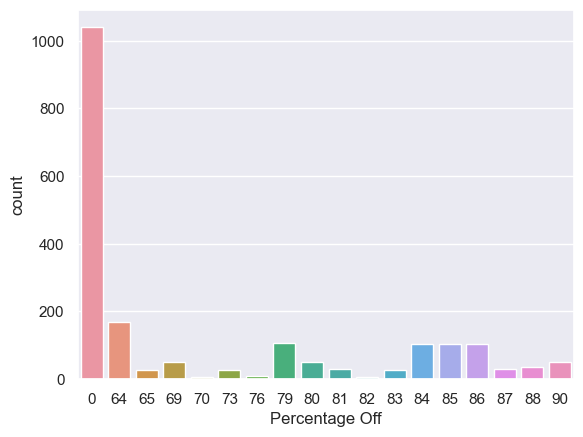

In [541]:
sns.countplot(x=new_df['Percentage Off'])

__Observation :__
Maxmimum product don't offers discount.

#### 4. Product Rating

In [542]:
new_df['Product Rating'].unique()

array([0. , 3.8, 4. , 3.9, 3.7, 4.1])

In [543]:
new_df['Product Rating'].value_counts()

0.0    1279
4.0     313
3.8     122
3.9     111
3.7     108
4.1      47
Name: Product Rating, dtype: int64

<Axes: ylabel='Product Rating'>

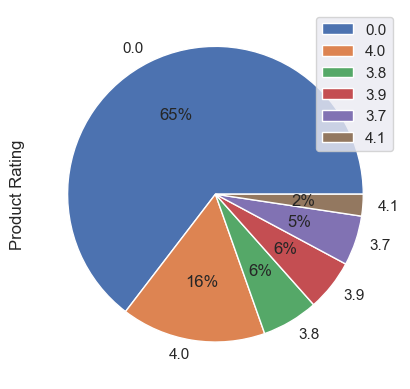

In [544]:
new_df['Product Rating'].value_counts().plot(kind='pie',autopct='%1.f%%',legend=True)

__Observation :__
66% people has not rated, 15% rated 4.0, least 4.1

#### 5. Sizes

In [545]:
new_df['Sizes'].unique()

array(['No size Available', 'S,M,L,XL,XXL', 'S,M,L,XXL', 'S,XL',
       'S,M,L,XL', 'M,L,XL', 'S,L,XL,XXL', 'XS,S,M,L,XL,XXL',
       'S,M,L,XL,XXL,3XL,4XL,5XL', 'L', 'S', 'M,L,XL,XXL', 'S,M,XL,XXL',
       '3XL,4XL,5XL,6XL', 'S,M,XL', 'S,L,XXL'], dtype=object)

In [546]:
new_df['Sizes'].value_counts()

No size Available           940
S,M,L,XL,XXL                664
S,M,L,XL                    198
S,M,L,XXL                    54
S,L,XL,XXL                   28
M,L,XL                       26
XS,S,M,L,XL,XXL              23
S                            18
L                             9
S,XL                          8
S,M,L,XL,XXL,3XL,4XL,5XL      5
3XL,4XL,5XL,6XL               3
M,L,XL,XXL                    1
S,M,XL,XXL                    1
S,M,XL                        1
S,L,XXL                       1
Name: Sizes, dtype: int64

<Axes: >

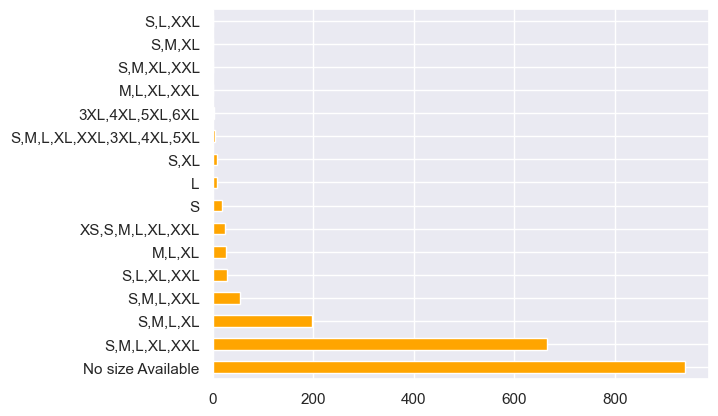

In [547]:
new_df['Sizes'].value_counts().plot.barh(color='orange')

__Observation :__

Maximum product of size that are present is of size S,M,L,XL,XXL.

No size available the product is been sell.

#### 6. Total no of Rating

In [548]:
new_df['Total no of Rating'].unique()

array([     0,  11386,  11254,  13375,  66706,  14701,  40617,   1133,
        11070,   9390,  20961, 100218,  72771,   6733,   3187, 100015,
        29040,   2472,  48111,   3629,  10942,  20813,  72548,  28977,
         1121,  11012,    805,    746,  81564,  48017,    321,  72773,
        11328,  66605,   3605,   9391, 100225,   3135])

<Axes: xlabel='Total no of Rating', ylabel='Count'>

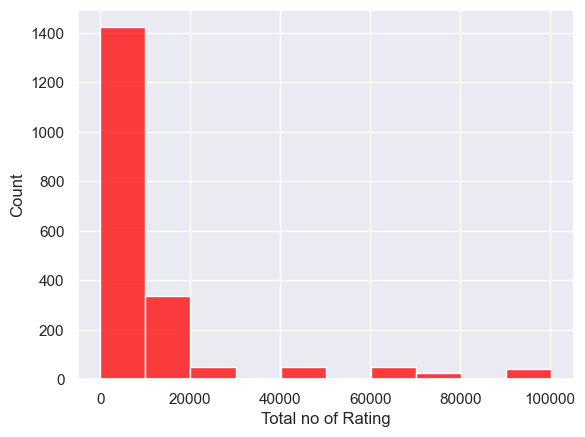

In [549]:
sns.histplot(new_df['Total no of Rating'],color='red',bins=10)

__Observation :__

Maximum number of people as not rated the product,

0-20000 has highest peak which are rated.

<Axes: >

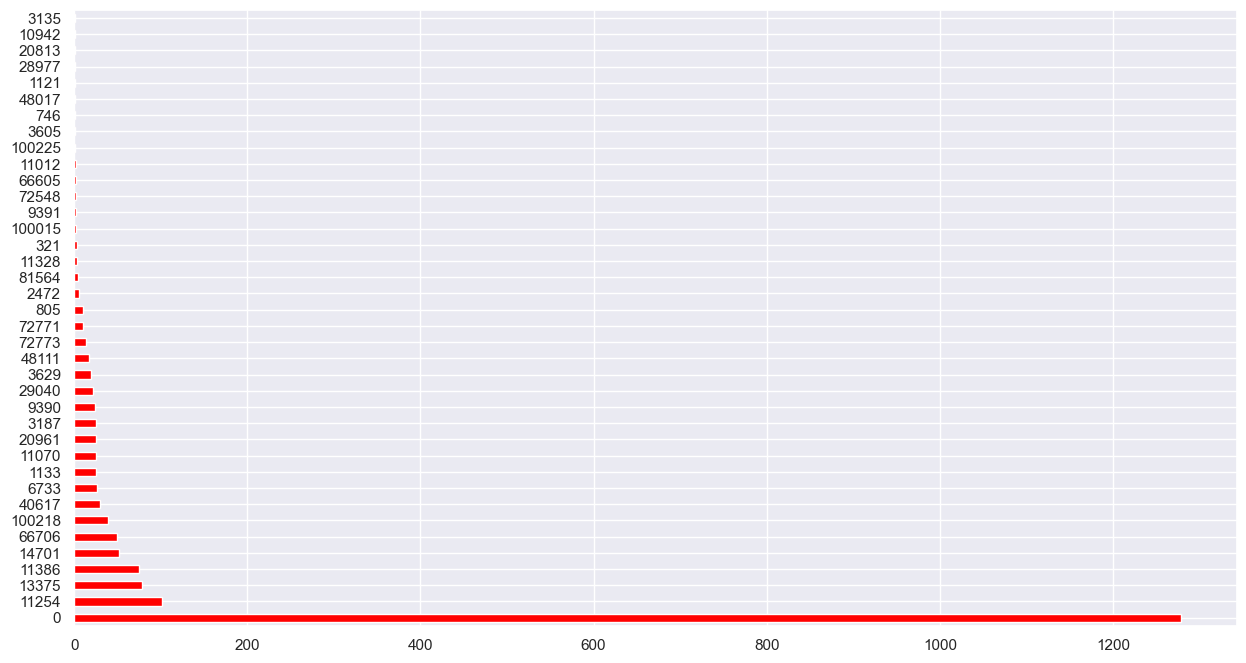

In [562]:
plt.figure(figsize=(15,8))
new_df['Total no of Rating'].value_counts().plot.barh(color='red')

#### 7. Total no of Review

In [558]:
new_df['Total no of Review'].unique()

array([   0,  841,  709,  989,  686, 3794,  869,  669, 2880,   53,  562,
        806, 1211, 7796, 5861,  476,  267, 7967, 2330,  109, 3696, 1289,
       5741,  271,  265, 3742, 1025, 4054, 2903,  604, 1278,  270,  482,
         60, 5726,  609, 2323, 7974,  814,  670,   47,   43, 6384, 3691,
         11,  836, 3789,   50,  261, 6517, 2360,   13,  863, 4049,  263])

<Axes: xlabel='Total no of Review', ylabel='Count'>

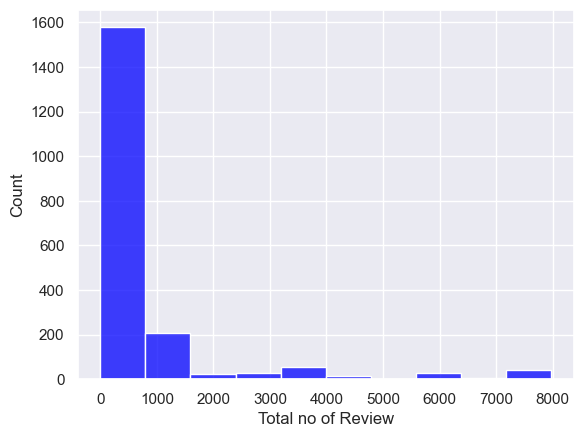

In [560]:
sns.histplot(new_df['Total no of Review'],color='blue',bins=10)

__Observation :__

Maximum number of people as not review the product,

1000-1500 has highest peak which are rated.

<Axes: >

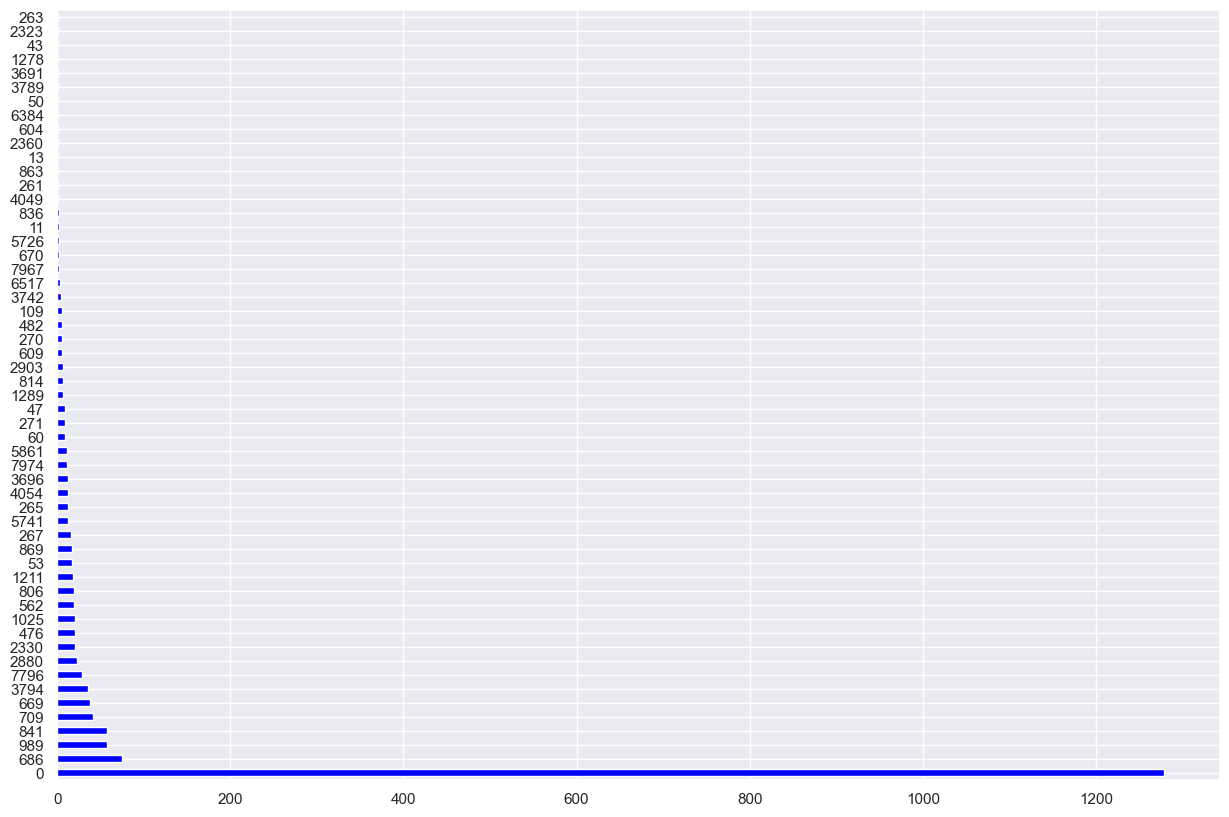

In [565]:
plt.figure(figsize=(15,10))
new_df['Total no of Review'].value_counts().plot.barh(color='blue')

#### 7. Analyzing Product Price and Percentage Off

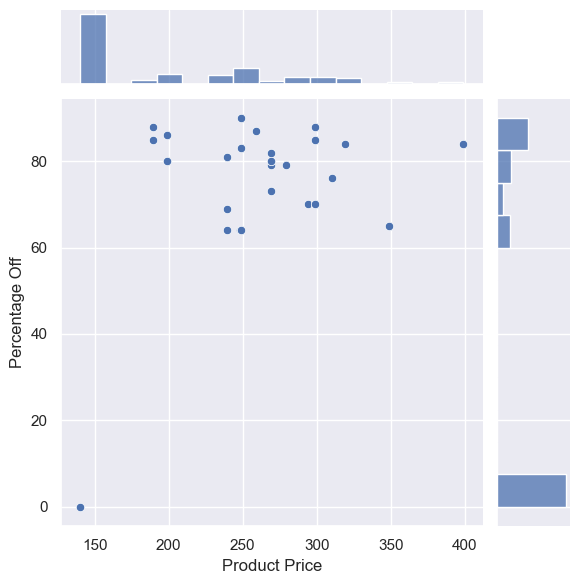

In [596]:
sns.jointplot(x='Product Price',y='Percentage Off',data=new_df)

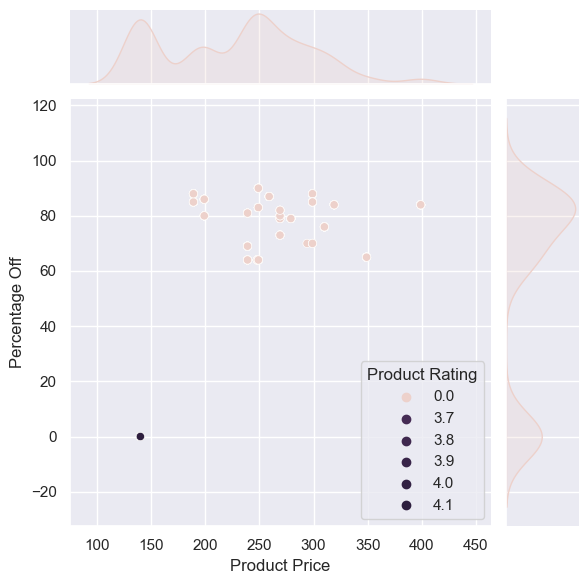

In [595]:
sns.jointplot(x='Product Price',y='Percentage Off',hue='Product Rating',data=new_df)

__Observation :__

At Price 200 to 300 more offer present but no rating is given by customer.

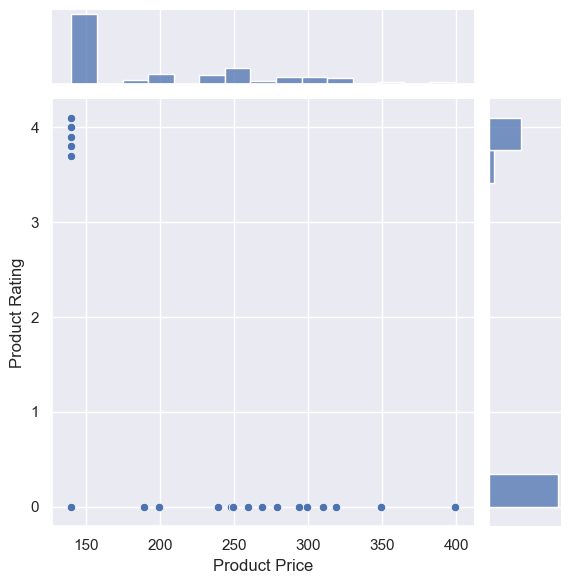

In [594]:
sns.jointplot(x='Product Price',y='Product Rating',data=new_df)

__Observation :__

At Price Rs 0-150 the customer customer rated more product.

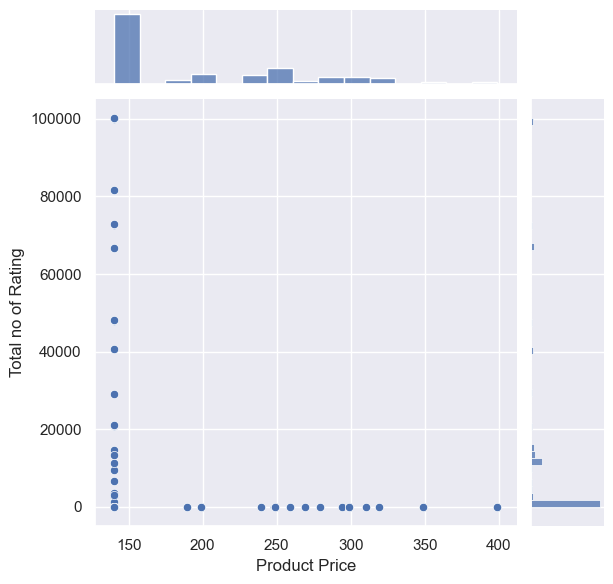

In [597]:
sns.jointplot(x='Product Price',y='Total no of Rating',data=new_df)

__Observation :__

At Price Rs 0-150 the customer customer rated more product.


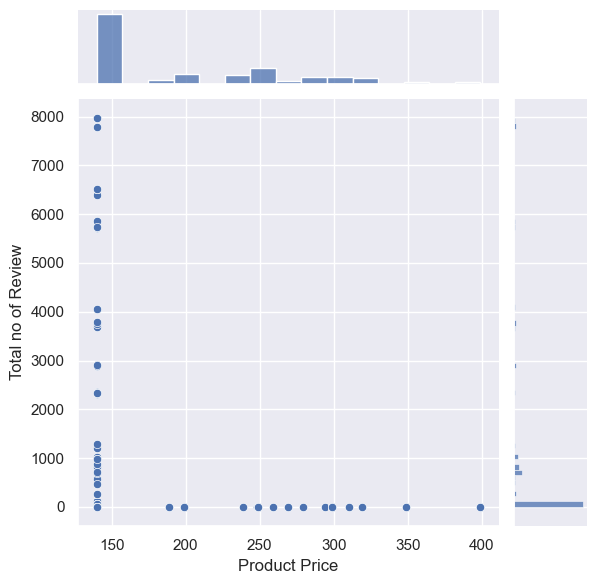

In [599]:
sns.jointplot(x='Product Price',y='Total no of Review',data=new_df)

__Observation :__

At Price Rs 0-150 the customer customer review more product.

In [614]:
new_df.groupby('Product Names')['Product Price'].max().sort_values(ascending=False)

Product Names
InkTees                  399
3BROS                    349
METRONAUT By Flipkart    319
V DAS                    310
METRONAUT                299
EyeBogler                299
Adrenex                  294
VeBNoR                   279
KAJARU                   269
Triangletees             269
TEEMEX                   269
TRIPR                    259
BLIVE                    259
Smartees                 249
MBFMart                  249
NB NICKY BOY             239
AUSK                     199
Try This                 199
London Hills             189
NB                       140
COLORPLUS                140
TQH                      140
The                      140
London                   140
Try                      140
V                        140
FTX                      140
Name: Product Price, dtype: int32

<Axes: ylabel='Product Names'>

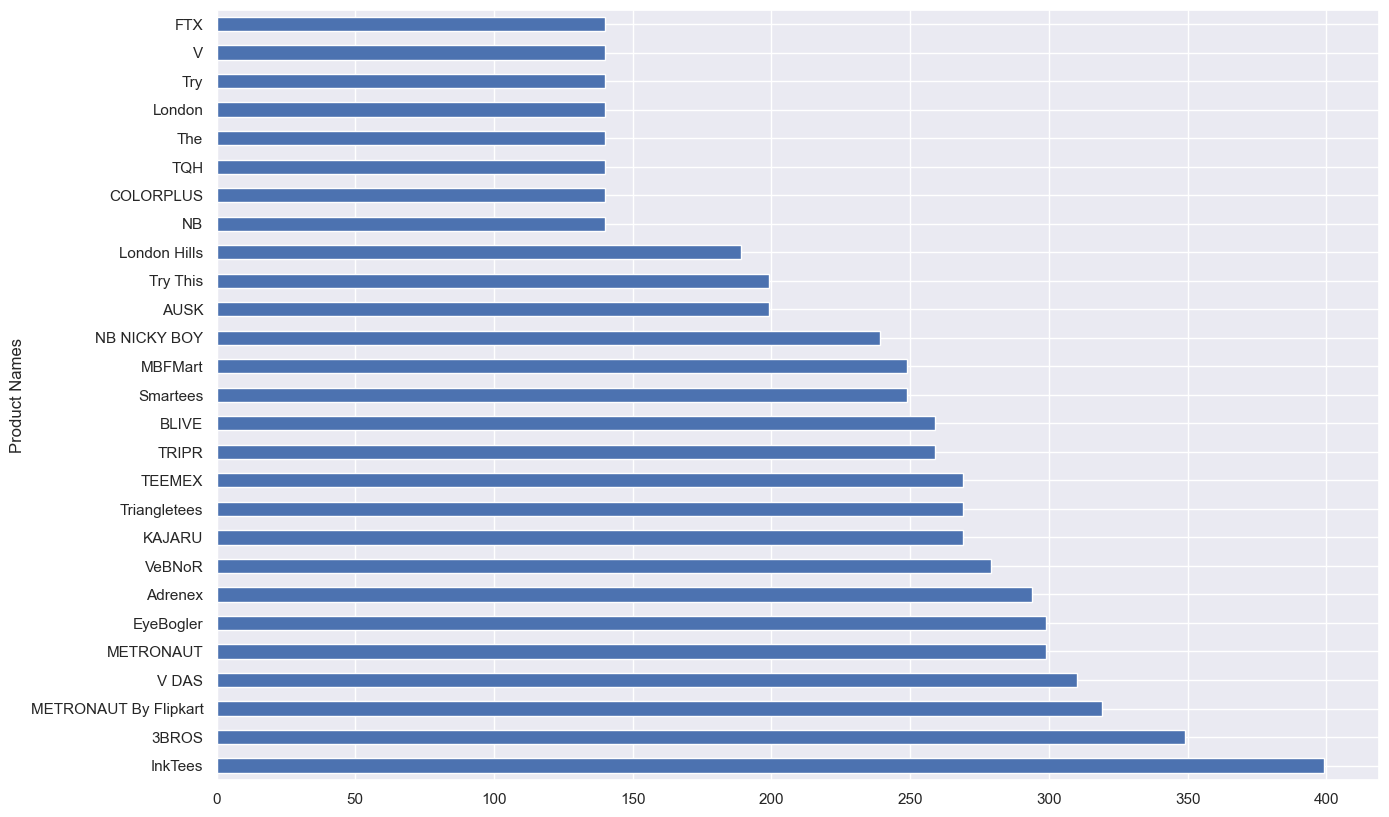

In [617]:
plt.figure(figsize=(15,10))
new_df.groupby('Product Names')['Product Price'].max().sort_values(ascending=False).plot.barh()

__Observation :__

Ink Tees is expensive.

FTX is cheapest price.

<Axes: ylabel='Product Names'>

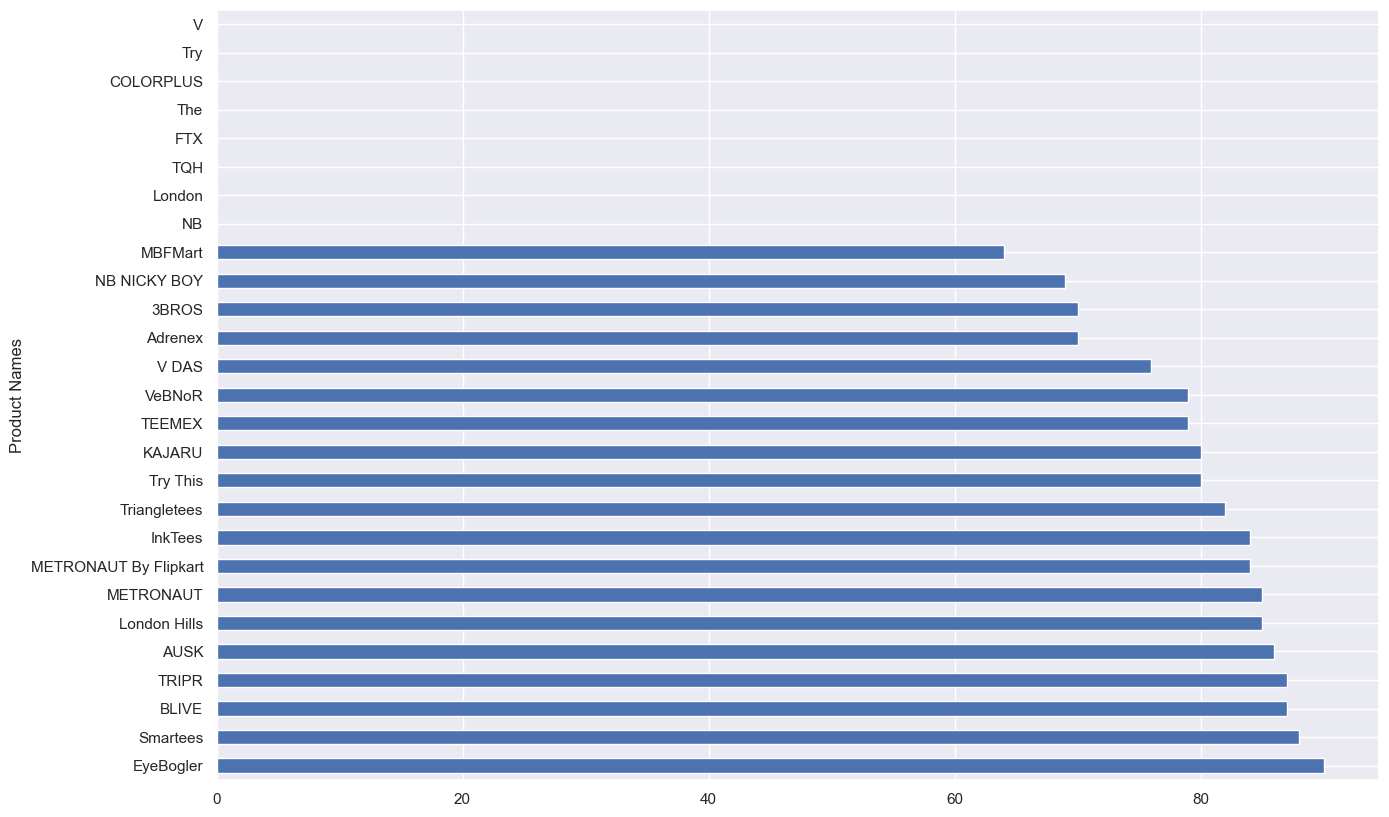

In [618]:
plt.figure(figsize=(15,10))
new_df.groupby('Product Names')['Percentage Off'].max().sort_values(ascending=False).plot.barh()

__Observation :__
    
1. EyeBogler price is 300 but its giving me more oof.

2. InkTees giving me something 81% off which is not bad deal.

<Axes: ylabel='Product Names'>

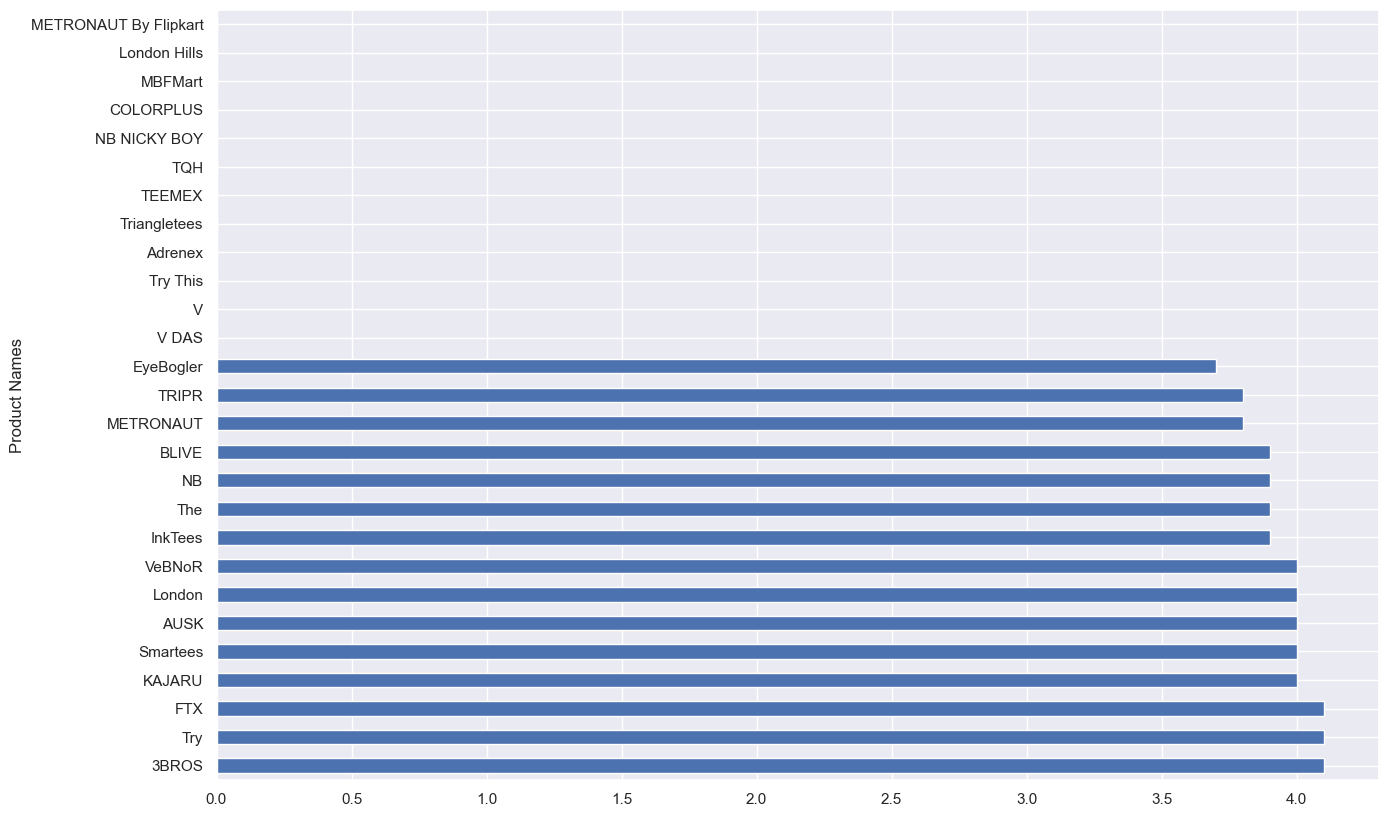

In [621]:
plt.figure(figsize=(15,10))
new_df.groupby('Product Names')['Product Rating'].max().sort_values(ascending=False).plot.barh()

__Observation :__

1. Most Customer rated 3BROS more and it's price is 350 which is pretty expensive but 3BROS giving something 70% Off.

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_13804\3819351706.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(),annot=True)
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_13804\3819351706.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(method='pearson'),annot=True)
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_13804\3819351706.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(method='spearman'),anno

<Axes: >

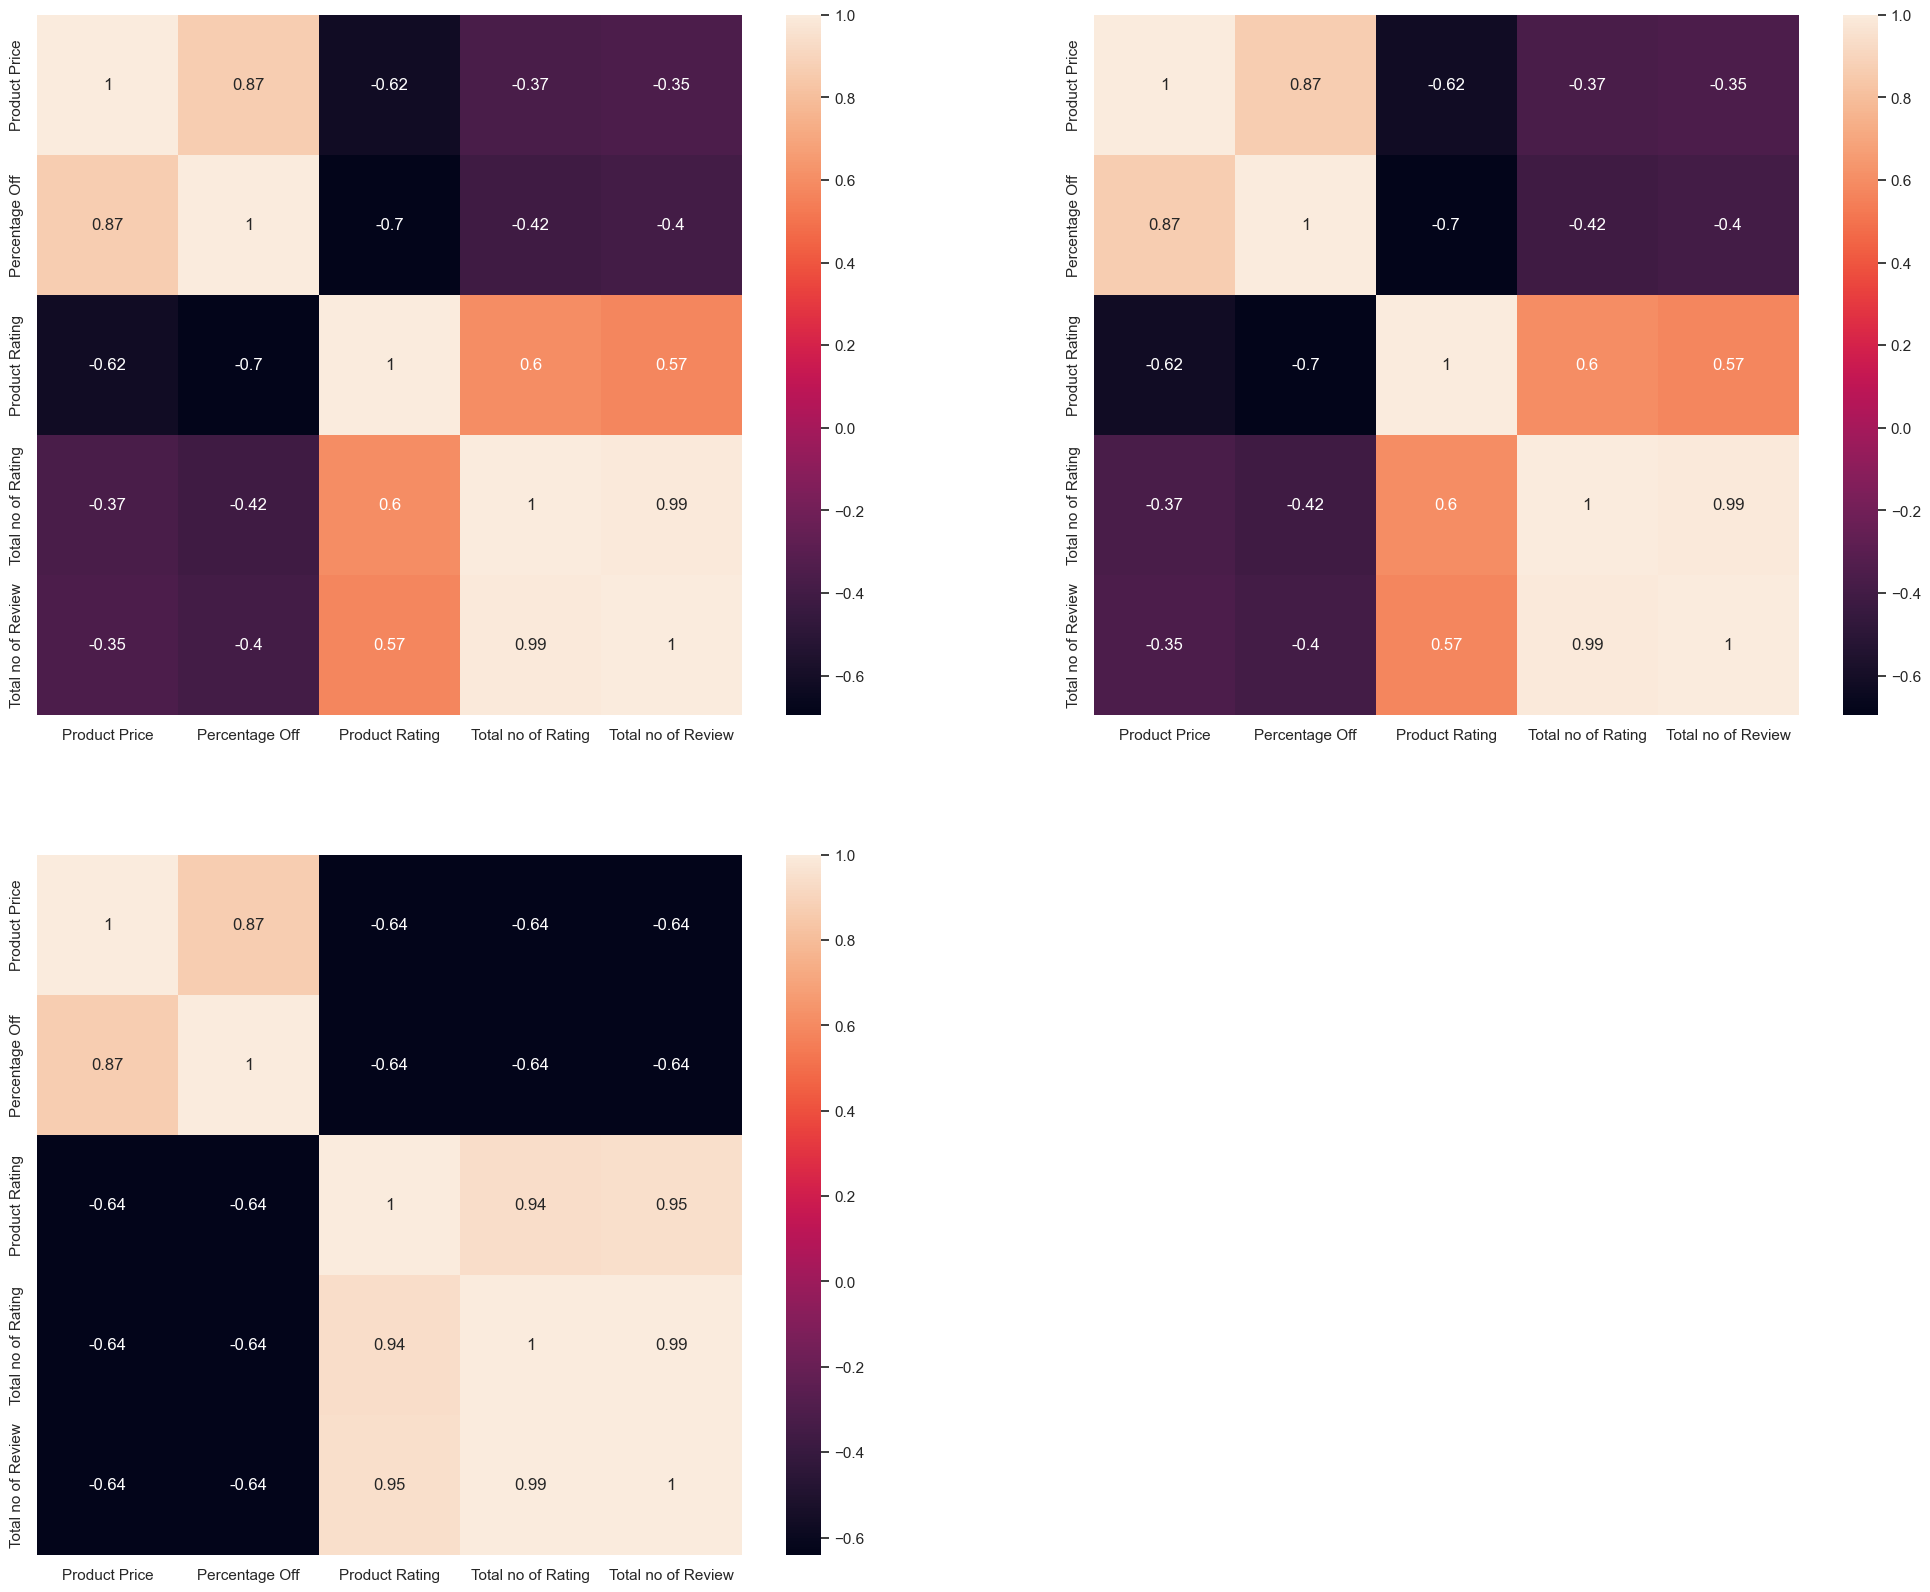

In [584]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.heatmap(new_df.corr(),annot=True)
plt.subplot(2,2,2)
sns.heatmap(new_df.corr(method='pearson'),annot=True)
plt.subplot(2,2,3)
sns.heatmap(new_df.corr(method='spearman'),annot=True)

__Observation :__

1. Total Number Review and Total Number Rating showimg highest correlation (0.99) more likely to have unique value.
2. Product Price and Percentage Off showing correlation of (0.87).
3. Product Rating and Total Number Rating showing correlation of (0.6).
4. Product Rating and Total number of reviews showing correlation of (0.57).

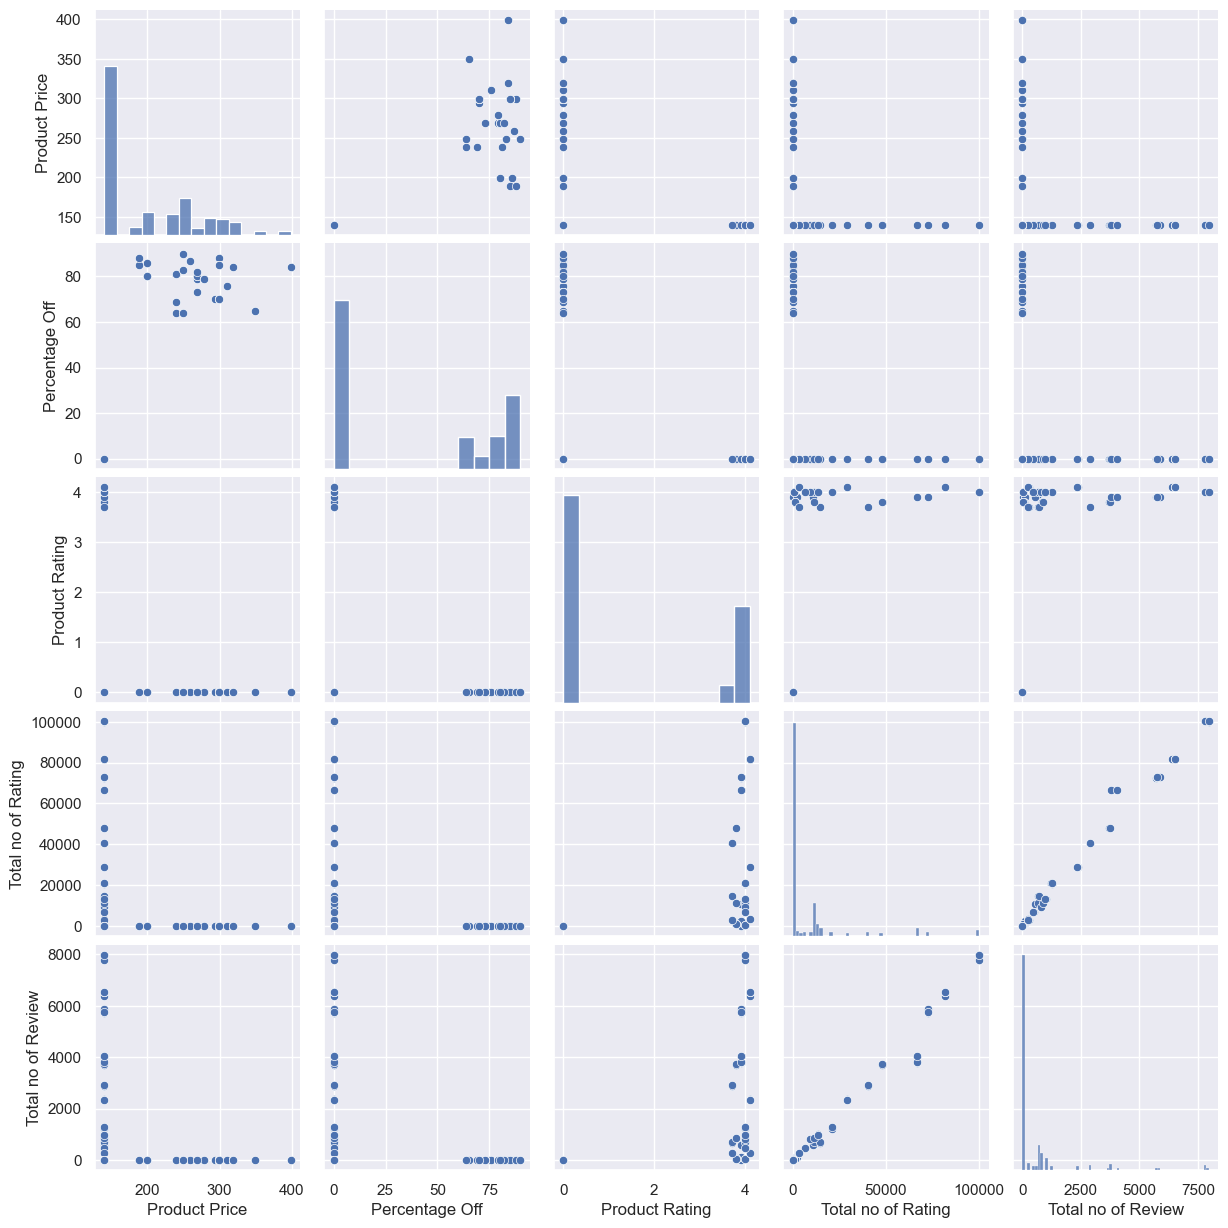

In [585]:
sns.pairplot(new_df)

# Conclusion :
__We have succesfully analyse the product of men shirt by using web scraping.__